## Replication Project

In my statistics course, we replicated a project for two purposes: a. to put our STATA and statistical knowledge to use and b. to understand the value of a clean and transparent workflow to understand how researchers arrive at their conclusion. 

In this project, since I have been learning and practicing Python, I will use Python to replicate the results. 



### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# scipi is a library for statistical tests and visualizations 
from scipy import stats
# random enables us to generate random numbers
import random
import matplotlib.dates as mdates
import scipy
from IPython.display import display, Math, Latex, HTML
from jinja2 import Template

### Retrieving Data

Fuhrmann, Matthew, Todd S. Sechser. 2014. "Signaling Alliance Commitments: Hand-Tying and Sunk Costs in Extended Nuclear Deterrence. *American Journal of Political Science* 54(4): 919-935

I found this data from the American Journal of Political Science website database. 
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/27466


In [2]:
rep_data = pd.io.stata.read_stata('Fuhrmann-Sechser-Appendices_2.dta')
rep_data.to_csv('Fuhrmann-Sechser-Appendices_2') 

In [3]:
rep_data.sample(10)


,state_a,state_b,year,military_conflict,defense_pact_nuclear_cow,defense_pact_nuclear_atop,nuclear_deployment,defense_pact_nonnuclear_cow,defense_pact_nonnuclear_atop,us_troops,...,shared_rival_nuclear,time_deploy,time_deploy2,time_deploy3,trade,defense_pact_nuclear_uncommon,military_conflict_force,time_force,time_force2,time_force3
367189,352,90,1982,0.0,1,1,0,1,1,0.024000,...,0,22,484,10648.0,0.000000,1,0.0,22,484.0,10648.0
51710,52,812,1972,0.0,0,0,0,0,0,0.000000,...,1,10,100,1000.0,0.000000,0,0.0,10,100.0,1000.0
392420,365,439,1990,0.0,0,0,0,1,1,0.006000,...,0,30,900,27000.0,0.700000,0,0.0,30,900.0,27000.0
488131,434,701,1995,0.0,0,1,0,0,0,0.001000,...,0,4,16,64.0,0.000000,0,0.0,4,16.0,64.0
379152,355,775,1979,0.0,0,0,0,0,0,0.011000,...,0,29,841,24389.0,0.000000,0,0.0,29,841.0,24389.0
367739,352,150,1979,0.0,1,1,0,1,1,0.013000,...,0,19,361,6859.0,0.000000,1,0.0,19,361.0,6859.0
443479,395,540,1994,0.0,0,0,0,1,0,0.000000,...,0,19,361,6859.0,0.000000,0,0.0,19,361.0,6859.0
264705,225,560,1972,0.0,0,1,0,0,0,0.017000,...,0,22,484,10648.0,14.000000,0,0.0,22,484.0,10648.0
974400,812,694,1982,0.0,0,0,0,1,1,0.000000,...,0,11,121,1331.0,0.000000,0,0.0,11,121.0,1331.0
713829,600,260,1957,0.0,1,1,1,1,1,244.406998,...,0,0,0,0.0,18.200001,1,0.0,1,1.0,1.0


### Primary Research Question

This article evaluates the effectiveness of different ways of signaling allaince commitments in detering conflict. In other words, how do leaders who are willing to defend their allies with military force, convince others of this without actually having to fight? 

Thus, the research questions are as follows: Can nuclear states achieve successful extended deterrence by announcing defensive allainces with protege states? Or must they deploy nuclear weapons on an ally’s territory before their commitment is seen as believable? 

Dependent Variable: The occurence of military conflict (Militarized Dispute Initiation) 
Independent Variable(1): Defense pact with allies Independent Variable (2): Nuclear deployment

### Proposed Answer
The theoretically motivated answers to the research question are as follows. The research question aims to seek explore the deterrence capability of a publicly made defense pact by nuclear powers.

a. Formal defense pacts with nuclear states have deterrence benefits. Having a defense pact with nuclear-armed ally is associated with a lower likelihood of being targeted in a militarized conflict.

b. Foreign deployed nuclear weapons are not that effective in deterring conflict. Deploying nuclear weapons on an ally’s territory does not reduce the likelihood that the ally will be targeted in a militarized dispute, once the effect of alliance is accounted for.

### Primary Hypotheses

The article tests two major hypothesis:

*Hypothesis 1*: Having a public defence pact with a nuclear state reduces the likelihood of being targeted in a militarized interstate dispute. 

*Hypothesis 2*: Hosting another state’s nuclear weapons on one’s territory reduces the likelihood of being targeted in a militarized interstate dispute.

Both hypotheses have significant implications for exploring the deterrance capacity of nuclear weapons and they also contribute to debates regarding whether a nuclear-armed world is better for minimizing conflicts or should the world get rid of all the nuclear weapons altogether. Moreover, it also contributes to the debate regarding whether verbal alliance commitments are considered credible signals in an international system, which if one takes the realist assumption, is anarchic, over costly signals such as extraterritorial nuclear deployments.

### Analysis that I am to produce

The analysis uses probit estimates. For my analysis, I will use logit regression for two reasons. a. To see how the results differ from the probit models and b. Logit regression is considered to be more popular and robust than probit models. 

### Unit of Analysis and Statistical Sample

Unit of Analysis: The unit of analysis is the directed dyad-year. The dyad year allows to distinguish between initiators and targets in militarized dispute. For example, a dispu te initiated by Japan against North Korea is considered distinct from a dispute initiated by North Korea against Japan. The sample contains information about states in the international system from 1950 to 2000. The authors begin their analysis in 1950 because this is the first year for which they have data on all the independent variables.

### Overview of Variables in the Data

In [4]:
#The table below gives an overview of the variables in the Data. 
d = {'a': 2, 'b': 3}

# content of the template that can be externalised
template_content = """
<table>
   <tr>
        <th> Variable Name in Article </th>
        <th> Variable Name in Data Set </th>
        <th> Ready to Use </th>
        <th> Notes </th>
   </tr>
   <tr>
        <td> Defense Pact with Nuclear Power </td>
        <td> defense_pact_nuclear_cow </td>
        <td> Yes </td>
        <td> defense pact nuclear atop is used in Model 2 </td>
   </tr>
   <tr>
        <td> Nuclear Deployment </td>
        <td> nuclear_deployment </td>
        <td> Yes </td>
        <td>  </td>
   </tr>
   <tr>
        <td> Defense pact with nuclear power*nuclear deployment </td>
        <td> defense_pact_deployment </td>
        <td> Yes </td>
        <td>  </td>
   </tr>
   <tr>
        <td> Defense pact with nonnuclear power </td>
        <td> defense_pact_nuclear_cow </td>
        <td> Yes </td>
        <td> defense pact nuclear atop is used in Model 2</td>
   </tr>
    <tr>
        <td> U.S Troops </td>
        <td> us_troops </td>
        <td> Yes </td>
        <td>  </td>
   </tr>
     <tr>
        <td> Nuclear challenger </td>
        <td> challenger_nuclear_weapons </td>
        <td> Yes </td>
        <td>  </td>
   </tr>
    <tr>
        <td> Nuclear target </td>
        <td> target_nuclear_weapons </td>
        <td> Yes </td>
        <td>  </td>
   </tr>
    <tr>
        <td> Contiguity </td>
        <td> contiguity </td>
        <td> Yes </td>
        <td>  </td>
   </tr>
    <tr>
        <td> Alliance with challenger </td>
        <td> alliance_with_challenger_cow </td>
        <td> Yes </td>
        <td> alliance_with_challenger_atop used in Model 2 </td>
   </tr>
    <tr>
        <td> Foreign Policy Similarity </td>
        <td> foreign_policy_similarity </td>
        <td> Yes </td>
        <td> </td>
   </tr>
    <tr>
        <td> Power ratio </td>
        <td> power_ratio </td>
        <td> Yes </td>
        <td> power_ratio_allies used in Model 4 </td>
   </tr>
     <tr>
        <td> Challenger polity </td>
        <td> challenger_polity </td>
        <td> Yes </td>
        <td>  </td>
   </tr>
     <tr>
        <td> Target polity </td>
        <td> target_polity </td>
        <td> Yes </td>
        <td>  </td>
   </tr>
    <tr>
        <td> Challenger Polity * Target polity </td>
        <td> polity_interaction </td>
        <td> Yes </td>
        <td>  </td>
   </tr>
    <tr>
        <td> Time </td>
        <td> time_conflict </td>
        <td> Yes </td>
        <td>  </td>
   </tr>
    <tr>
        <td> Time (Squared) </td>
        <td> time_conflict2 </td>
        <td> Yes </td>
        <td>  </td>
   </tr>
     <tr>
        <td> Time (Cubed) </td>
        <td> time_conflict3 </td>
        <td> Yes </td>
        <td>  </td>
   </tr>
</table>"""

template = Template(template_content)

# template rendering embedded in the HTML representation
HTML(template.render(data=d))

Variable Name in Article,Variable Name in Data Set,Ready to Use,Notes
Defense Pact with Nuclear Power,defense_pact_nuclear_cow,Yes,defense pact nuclear atop is used in Model 2
Nuclear Deployment,nuclear_deployment,Yes,
Defense pact with nuclear power*nuclear deployment,defense_pact_deployment,Yes,
Defense pact with nonnuclear power,defense_pact_nuclear_cow,Yes,defense pact nuclear atop is used in Model 2
U.S Troops,us_troops,Yes,
Nuclear challenger,challenger_nuclear_weapons,Yes,
Nuclear target,target_nuclear_weapons,Yes,
Contiguity,contiguity,Yes,
Alliance with challenger,alliance_with_challenger_cow,Yes,alliance_with_challenger_atop used in Model 2
Foreign Policy Similarity,foreign_policy_similarity,Yes,


### Overview of the Dependent Variable

For information about the dependent variable, the Correlates of War (COW) Militarized Interstate Dispute (MID) datatset is used, which includes information about historical disputes between countries, such as threats to use force, alerts, military mobilizations, seizures, border clashes, and attacks. The authors are interested in the connections between extended deterrance and violent conflict; as a result, only those cases are included that have resulted in fatalities. However, many dyads such as Burkina Faso-Guyana, because of their economic and military conditions, do not have a realistic opportunity to fight, the sample only use s dyads that contain at least one major power or countries located within 400 miles of o ne another, in order to avoid artificially inflating the sample size.

### Summarizing and Cleaning Data

In [5]:
rep_data['military_conflict'].describe()

count    1.055924e+06
mean     3.068403e-04
std      1.751418e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: military_conflict, dtype: float64

In [6]:

rep_data["military_conflict"].unique()
print(rep_data.shape)
rep_data =  rep_data.dropna() #dropping observations without value
print(rep_data.shape)
rep_data['military_conflict'] = rep_data['military_conflict'].astype(int)
rep_data["military_conflict"].unique()
rep_data['military_conflict'].describe()


(1056066, 49)
(719295, 49)


count    719295.000000
mean          0.000349
std           0.018677
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: military_conflict, dtype: float64

In [7]:
rep_data['military_conflict'].dtypes
rep_data[rep_data["military_conflict"]== 1]


,state_a,state_b,year,military_conflict,defense_pact_nuclear_cow,defense_pact_nuclear_atop,nuclear_deployment,defense_pact_nonnuclear_cow,defense_pact_nonnuclear_atop,us_troops,...,shared_rival_nuclear,time_deploy,time_deploy2,time_deploy3,trade,defense_pact_nuclear_uncommon,military_conflict_force,time_force,time_force2,time_force3
112,2,40,1983,1,0,0,0,0,0,0.000,...,1,20,400,8000.0,0.000000,0,1.0,6,36.0,216.0
1989,2,265,1985,1,1,1,1,1,1,0.000,...,0,0,0,0.0,102.300003,0,0.0,26,676.0,17576.0
2146,2,315,1953,1,1,1,0,1,1,0.000,...,0,3,9,27.0,2.000000,0,1.0,3,9.0,27.0
2654,2,365,1964,1,0,1,0,1,1,0.000,...,1,14,196,2744.0,23.000000,0,1.0,1,1.0,1.0
2655,2,365,1965,1,0,1,0,1,1,0.000,...,1,15,225,3375.0,46.000000,0,1.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981413,816,710,1987,1,0,0,0,1,1,0.022,...,1,33,1089,35937.0,0.000000,0,1.0,2,4.0,8.0
982034,816,800,1995,1,0,0,0,0,0,0.099,...,1,41,1681,68921.0,515.018005,0,1.0,5,25.0,125.0
1009053,850,210,1953,1,1,1,0,1,1,0.083,...,1,3,9,27.0,90.000000,1,1.0,1,1.0,1.0
1009060,850,210,1960,1,1,1,1,1,1,0.777,...,1,10,100,1000.0,29.000000,1,1.0,2,4.0,8.0


### Visualizing Dependent Variable

Text(0.5, 0, 'Military Conflict')

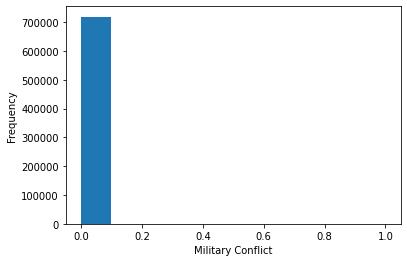

In [8]:
plt.hist(rep_data['military_conflict'])
plt.ylabel('Frequency')
plt.xlabel('Military Conflict')

I wanted to see the distribution of military conflict over the years. Since the data was very big, I took a sample and used a scatterplot. I am trying to assess the best way of visualizing binary variables. 

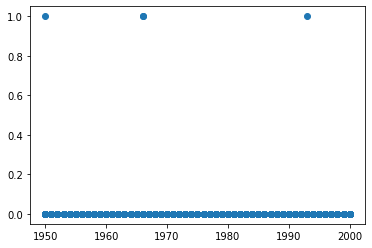

In [9]:
sample_rep_data = rep_data.groupby('year').apply(lambda x: x.sample(frac=0.01))
sample_rep_data['military_conflict']
plt.scatter(sample_rep_data['year'], sample_rep_data['military_conflict'])

### Overview of the Independent Variables

The key explanatory variables used in the articles are Defence Pact Alliance (defence_pact_nuclear_cow) and Nuclear Deployment (nuclear_deployment).

#### Defense Pact Alliance

The first independent variable of interest, defense pact alliance, is measured using two sources. First, the study consults the COW formal alliance dataset which is coded 1 if a potential target of a dispute has a public defense pact with a nuclear-armed state and 0 if not. 44 percent of the observations in the sample are coded as having nuclear protection. In order to ensure robustness of results, Alliance Treaty
Obligations and Provisions (ATOP) dataset, is also used. The ATOP and COW datasets are largely similar, save for some differences.

In [10]:
rep_data['defense_pact_nuclear_cow'].describe()


count    719295.000000
mean          0.381479
std           0.485750
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: defense_pact_nuclear_cow, dtype: float64

In [11]:
rep_data['defense_pact_nuclear_cow'].dtype

dtype('int8')

In [12]:
rep_data['defense_pact_nuclear_cow'].unique() #no NAN values


array([0, 1], dtype=int8)

In [13]:
print(rep_data.shape)

(719295, 49)


Text(0.5, 0, 'Defense Pact with Nuclear Power')

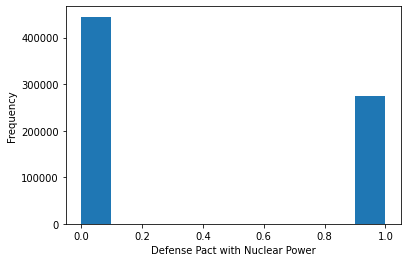

In [14]:
plt.hist(rep_data['defense_pact_nuclear_cow'])
plt.ylabel('Frequency')
plt.xlabel('Defense Pact with Nuclear Power')

In [15]:
rep_data['defense_pact_nuclear_atop'].describe()

count    719295.000000
mean          0.443053
std           0.496747
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: defense_pact_nuclear_atop, dtype: float64

In [16]:
rep_data['defense_pact_nuclear_atop'].unique() #no NaN values

array([0, 1], dtype=int8)

In [17]:
rep_data['defense_pact_nuclear_atop'].dtype

dtype('int8')

Text(0.5, 0, 'Defense Pact with Nuclear Power_Atop')

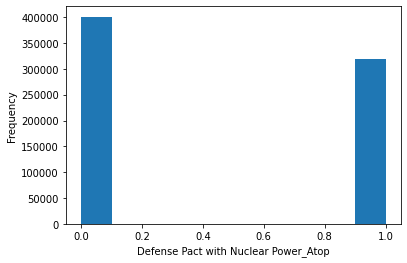

In [18]:
plt.hist(rep_data['defense_pact_nuclear_atop'])
plt.ylabel('Frequency')
plt.xlabel('Defense Pact with Nuclear Power_Atop')

#### Nuclear Deployment
To measure the second independent variable of interest, nuclear deployment, the authors constructed a new dataset of extraterritorial nuclear deployments based on government documents and historical literature due to classfied information on foreign nuclear deployments. The variable is coded 1 if a state had foreign- deployed nuclear weapons on its territory in a given year and 0 if it did not. These deployments occur in about 13 percent of the dyad-year observations in the sample. Three possible types of foreign nuclear deployments are excluded: accidental nuclear deployment of weapons by the Soviet Union in Ukraine, Belarus, and Kazakhtan in the 1990s, three cases in which the US deployed nuclear weapons without their fissile cores, rendering weapons non-nuclear, deployment of nuclear weapons on Japanese Islands of Chichi Jima , Iwo Jime, and Okinawa, as they were under US control during the period of deployment.

In [19]:
rep_data['nuclear_deployment'].describe()

count    719295.000000
mean          0.086519
std           0.281130
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: nuclear_deployment, dtype: float64

In [20]:
rep_data['nuclear_deployment'].unique() #no NaN values

array([0, 1], dtype=int8)

In [21]:
rep_data['nuclear_deployment'].dtype

dtype('int8')

Text(0.5, 0, 'Nuclear Deployment')

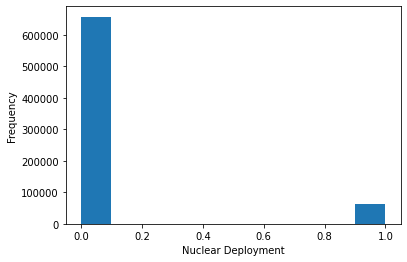

In [22]:
plt.hist(rep_data['nuclear_deployment'])
plt.ylabel('Frequency')
plt.xlabel('Nuclear Deployment')


The authors’ measurement of the outcome and explanatory variables appear robust, given the fact that the first independent variable of interest, defense pact allaince is measured using dataset from two sources. Similarly, as the explanation of second independent variable shows, the authors are very careful about selecting those nuclear weapon deployments that are meaningful to their analysis, in other words, those that signal efforts towards nuclear deterrance. The measurement of the outcome variable is also robust, given that it allows us to distingish between initiators and targers: each dyad-year represents one opportunity. In other words, a dispute initiated by Japan against North Korea is distinct from that initiated by North Korea against Japan. What I found odd was the authors excluding some dyads such as Burkina-Faso and Guyana because they do not ”have a realistic opportuntity to fight” (925). The authors co uld have been more clear about what they mean by ”realistic opportunity.” It is not clear whether the opportunities are dictated by economic condition, past relationships, history of conflict, or other factors.

#### Statistical Techniques
The article uses probit regression to estimate the effect of defense pact alliances and nuclear deployment on military conflict. Probit regression is used because our outcome variable is dichotomous, that is it takes the value of 0 or 1. The article does not use any regression equations. When the outcome variable is dichotomous, it is not that easy to interpret the effect of explana tory variables just by looking at the beta or the coefficients. We will detail the summary of findings below.

*Hypothesis 1*: Having a public defence pact with a nuclear state reduces the likel ihood of being targeted in a militarized interstate dispute. This hypothesis indicates that the parameter on defence pact alliance will be significant and negative.

*Hypothesis 2*: Hosting another state’s nuclear weapons on one’s territory reduces the likelihood of be- ing targeted in a militarized interstate dispute. This hypothesis indicates that the parameter on nuclear deployment will be significant an d negative.

### Summary of original findings

The article presents the findings that I set out to produce through a table and a graph. Table 1 shows four probit regression models. Model 1 is a baseline model with COW version of defense pact with nuclear armed countries, with all the control variables. Model 2 uses the ATOP version of defense pact with nuclear armed countries. Model 3 uses the interaction between defense pact alliance and nuclear deployment to test the possibility that whether stationing nuclear weapons on the territory of an ally is only effective in the presence of a defense alliance or whether it is equally effective in the absence of such a commitment. Model 4 includes the effect of conventional capabilities of nuclear armed states plays any role in detertting militarized disputes.

To summarize the findings of the four models briefly, the effect of defense pact alliance with a nuclear armed state on the possibility of being targeted in a militarized dispute is signficiant. The presence of a defense alliance with a nuclear armed states decreases the probability of a country being engaged in a militarized dispute. The effect of nuclear deployments on militarized conflict is statistically insignificant across all four models. Moreover, the marginal effect of nuclear deployments, the change in predicted probability of conflict that results from the changing the deployment variable from 0 to 1 is also statistically insignificant regardless of nuclear alliances being present or absent (Figure 3). Moreover, the control variables, Defense Pact with Nonnuclear Power and US. Troops are also insignificant, conveying that conventional signals of alliance commitments are less effective than having alliance with nuclear armed states. Despite controlling for conventional deterrence strategies, defense pact with nuclear power remains significant and negative. This implies that defense alliance with nuclear power is important is determining the probability of a country facing militarized dispute.

### Summary of my findings

In [23]:
import statsmodels.api as sm

In [24]:
# logit_mod = sm.Logit(rep_data['military_conflict'], red_data[])military_conflict defense_pact_nuclear_cow nuclear_deployment defense_pact_nonnuclear_cow
rep_data = rep_data[rep_data["politically_relevant"]== 1]
rep_data.head(5)

###Model 1
endog1 = rep_data['military_conflict']
exog1 = rep_data[['defense_pact_nuclear_cow', 'nuclear_deployment', 'defense_pact_nonnuclear_cow', "us_troops", 'challenger_nuclear_weapons', 'target_nuclear_weapons', 'contiguity', 'alliance_with_challenger_cow', 'foreign_policy_similarity', 'power_ratio', 'challenger_polity', 'target_polity', 'polity_interaction', 'time_conflict', 'time_conflict2', 'time_conflict3']]
logit_mod1 = sm.Logit(endog1, exog1)
logit_result1 = logit_mod1.fit(cov_type = 'cluster', cov_kwds={'groups': rep_data['dyad_id']}, use_t=True) 


Optimization terminated successfully.
         Current function value: 0.017215
         Iterations 11


In [25]:
Model_1 = logit_result1.summary()
print(Model_1)

                           Logit Regression Results                           
Dep. Variable:      military_conflict   No. Observations:                85150
Model:                          Logit   Df Residuals:                    85134
Method:                           MLE   Df Model:                           15
Date:                Thu, 24 Jun 2021   Pseudo R-squ.:                  0.1046
Time:                        10:15:32   Log-Likelihood:                -1465.8
converged:                       True   LL-Null:                       -1637.1
Covariance Type:              cluster   LLR p-value:                 7.735e-64
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
defense_pact_nuclear_cow        -1.1111      0.302     -3.685      0.000      -1.702      -0.520
nuclear_deployment               0.0205      0.554      0.037      0.970     

In [26]:
### Model 2


endog2 = rep_data['military_conflict']
exog2 = rep_data[["defense_pact_nuclear_atop", "nuclear_deployment", 'defense_pact_nonnuclear_atop', 'us_troops', 'challenger_nuclear_weapons', "target_nuclear_weapons", 'contiguity', 'alliance_with_challenger_atop',  'foreign_policy_similarity', 'power_ratio', 'challenger_polity', 'target_polity', 'polity_interaction',  'time_conflict', 'time_conflict2', 'time_conflict3']] 
logit_mod2 = sm.Logit(endog2, exog2)
logit_result2 = logit_mod2.fit(cov_type = 'cluster', cov_kwds={'groups': rep_data['dyad_id']}, use_t=True) 


Optimization terminated successfully.
         Current function value: 0.017322
         Iterations 11


In [27]:
Model_2 = logit_result2.summary()
print(Model_2)

                           Logit Regression Results                           
Dep. Variable:      military_conflict   No. Observations:                85150
Model:                          Logit   Df Residuals:                    85134
Method:                           MLE   Df Model:                           15
Date:                Thu, 24 Jun 2021   Pseudo R-squ.:                 0.09903
Time:                        10:15:33   Log-Likelihood:                -1475.0
converged:                       True   LL-Null:                       -1637.1
Covariance Type:              cluster   LLR p-value:                 5.005e-60
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
defense_pact_nuclear_atop        -0.7956      0.281     -2.832      0.005      -1.346      -0.245
nuclear_deployment               -0.0075      0.539     -0.014      0.989 

In [28]:
### Model 3

endog3 = rep_data['military_conflict']
exog3 = rep_data[['defense_pact_nuclear_cow', 'nuclear_deployment', 'defense_pact_deployment', 'defense_pact_nonnuclear_cow', 'us_troops', 'challenger_nuclear_weapons', 'target_nuclear_weapons', 'contiguity', 'alliance_with_challenger_cow', 'foreign_policy_similarity', 'power_ratio', 'challenger_polity', 'target_polity', 'polity_interaction', 'time_conflict', 'time_conflict2', 'time_conflict3']]
 
logit_mod3 = sm.Logit(endog3, exog3)
logit_result3 = logit_mod3.fit(cov_type = 'cluster', cov_kwds={'groups': rep_data['dyad_id']}, use_t=True)

Optimization terminated successfully.
         Current function value: 0.017095
         Iterations 11


In [29]:
Model_3 = logit_result3.summary()
print(Model_3)

                           Logit Regression Results                           
Dep. Variable:      military_conflict   No. Observations:                85150
Model:                          Logit   Df Residuals:                    85133
Method:                           MLE   Df Model:                           16
Date:                Thu, 24 Jun 2021   Pseudo R-squ.:                  0.1108
Time:                        10:15:33   Log-Likelihood:                -1455.6
converged:                       True   LL-Null:                       -1637.1
Covariance Type:              cluster   LLR p-value:                 2.099e-67
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
defense_pact_nuclear_cow        -1.3490      0.311     -4.337      0.000      -1.959      -0.739
nuclear_deployment              -2.4153      1.147     -2.106      0.035     

In [30]:
endog4 = rep_data['military_conflict']
exog4 = rep_data[['defense_pact_nuclear_cow', 'nuclear_deployment', 'defense_pact_nonnuclear_cow', 'us_troops', 'challenger_nuclear_weapons', 'target_nuclear_weapons', 'contiguity', 'alliance_with_challenger_cow', 'foreign_policy_similarity', 'power_ratio_allies', 'challenger_polity', 'target_polity', 'polity_interaction', 'time_conflict', 'time_conflict2', 'time_conflict3']]

logit_mod4 = sm.Logit(endog4, exog4)
logit_result4 = logit_mod4.fit(cov_type = 'cluster', cov_kwds={'groups': rep_data['dyad_id']}, use_t=True)

Optimization terminated successfully.
         Current function value: 0.016949
         Iterations 11


In [31]:
Model_4 = logit_result4.summary()
print(Model_4)

                           Logit Regression Results                           
Dep. Variable:      military_conflict   No. Observations:                85150
Model:                          Logit   Df Residuals:                    85134
Method:                           MLE   Df Model:                           15
Date:                Thu, 24 Jun 2021   Pseudo R-squ.:                  0.1184
Time:                        10:15:34   Log-Likelihood:                -1443.2
converged:                       True   LL-Null:                       -1637.1
Covariance Type:              cluster   LLR p-value:                 2.660e-73
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
defense_pact_nuclear_cow        -1.4002      0.294     -4.758      0.000      -1.977      -0.823
nuclear_deployment               0.1377      0.550      0.250      0.802     

### Summary of my findings

The findings from my analysis are largely similar to those of the authors. The effect of defense pact alliance with a nuclear armed state is significant and negative. Defense alliance with a nuclear armed state decreases the probability of a country being engaged in a militarized dispute. The effect of nuclear deployments on militarized conflict is statistically insignificant in Models 1, 2, and 4 but significant and negative in Model 3. 

The presence of the control variable, Presence of US Troops, is insignificant across all four models conveying that conventional signals of alliance commitments are less effective than having an alliance with nuclear armed states. The defense pact with nonnuclear power remains significant across all four models unlike what the authors found. This shows that defense pact with nonnuclear power is also significant in decreasing the possibility of military conflict. 

Overall, the findings show that nuclear diplomacy is much more helpful in curbing militarized dispute than nuclear deployment. 